# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [392]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/lab-intro-to-sklearn/your-code/')

Mounted at /content/drive


In [393]:
from google.colab import files
# uploaded = files.upload()

In [394]:
# Import your libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [395]:
import sklearn.datasets
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [396]:
diabetes = sklearn.datasets.load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [397]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [398]:
print(diabetes.DESCR )

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

What are the variables in this dataset according to the description? List them in the markdown cell below

Attribute Information:

      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6
    

Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [399]:
X, y = diabetes['data'], diabetes['target']
X.shape, y.shape

((442, 10), (442,))

In [400]:
# Use only one feature
X = X[:, np.newaxis, 2]

In [401]:
from sklearn.model_selection import train_test_split

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [403]:
# Split the data into training/testing sets

In [404]:
X_train.shape

(353, 1)

In [405]:
X_test.shape

(89, 1)

In [406]:
# Split the targets into training/testing sets

In [407]:
y_train.shape

(353,)

In [408]:
y_test.shape

(89,)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [409]:
from sklearn.linear_model import LinearRegression

Initialize the model in the variable `diabetes_model`

In [410]:
# Create linear regression object
diabetes_model = LinearRegression()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [411]:
# Train the model using the training sets
diabetes_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [412]:
# Make predictions using the testing set
y_pred_diabetes = diabetes_model.predict(X_test)

In [413]:
y_pred_diabetes

array([126.62130321, 186.23831445, 113.48535158,  95.29711086,
       109.44352031, 147.84091738, 155.92457992, 105.40168904,
       114.4958094 , 149.86183301, 150.87229083, 131.6735923 ,
       123.58992976, 130.66313448, 129.65267666, 121.56901412,
        99.33894213,  98.32848431, 195.33243481, 133.69450793,
       195.33243481, 122.57947194, 175.12327846, 222.61479589,
       147.84091738, 209.47884426, 184.21739881, 203.41609735,
        87.21344832, 242.82395224, 123.58992976, 184.21739881,
        80.1402436 ,  90.24482177, 158.95595337, 172.091905  ,
       104.39123122, 145.82000174, 216.55204898, 179.16510973,
       117.52718285, 210.48930207, 115.50626721, 130.66313448,
       153.90366429, 146.83045956, 232.71937406, 133.69450793,
       157.94549556, 160.97686901, 175.12327846, 164.00824246,
        96.30756868, 192.30106136,  78.11932796, 190.28014572,
       144.80954393, 116.51672503, 145.82000174, 115.50626721,
       219.58342243, 191.29060354, 170.07098937, 125.61

In [414]:
from sklearn.metrics import mean_squared_error, r2_score

In [415]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_diabetes))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_diabetes))

Coefficients: 
 [  16.03258095 -281.81961996  496.0544811   327.81770722 -537.60972801
  277.45375351   11.1054871   152.59166287  673.13493409   40.46898575]
Mean squared error: 3798.45
Coefficient of determination: 0.33


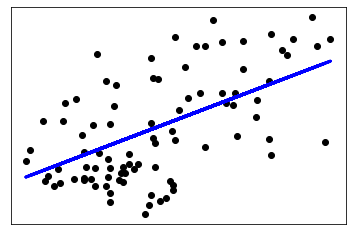

In [416]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_diabetes, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [417]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [418]:
results = smf.ols("y_train ~ X_train", data = diabetes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 04 May 2021   Prob (F-statistic):           3.39e-34
Time:                        23:47:29   Log-Likelihood:                -1961.0
No. Observations:                 353   AIC:                             3926.
Df Residuals:                     351   BIC:                             3934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.6486      3.340     45.700      0.0

R-squared: In percentage terms, 0.346 would mean our model explains 34,6% of the change in our 'y_train' variable.

Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.

Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. In this case Prob(Omnibus) is 0.021, which implies that the OLS assumption is not satisfied.

Durbin-watson: This implies that the variance of errors is constant. A value between 1 to 2 is preferred. Here, it is ~1.8 implying that the regression results are reliable from the interpretation side of this metric.

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [419]:
auto = pd.read_csv("drive/MyDrive/Colab Notebooks/lab-intro-to-sklearn/auto-mpg.csv")

Look at the first 5 rows using the `head()` function:

In [420]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [421]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [422]:
auto.shape

(398, 8)

What is the newest model year and the oldest model year?

In [423]:
newest_model = auto["model_year"].min()
print(newest_model)

70


In [424]:
oldest_model = auto["model_year"].max()
print(oldest_model)

82


Check the dataset for missing values and remove all rows containing at least one missing value.

In [425]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [426]:
auto = auto.dropna(how='any',axis=0) 

In [427]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [428]:
auto.shape

(392, 8)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [429]:
auto["cylinders"].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [430]:
auto.drop(columns=['car_name'], inplace=True)

In [431]:
auto.head(2)

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70


In [432]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [433]:
columnas_x = [a for a in (list(auto.columns)) if a != "mpg"]
columnas_x

['cylinders',
 'displacement',
 'horse_power',
 'weight',
 'acceleration',
 'model_year']

In [434]:
X = auto[columnas_x]
X.head(2)

,cylinders,displacement,horse_power,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70


In [435]:
y = auto.mpg
y.head(3)

0    18.0
1    15.0
2    18.0
Name: mpg, dtype: float64

In [436]:
X.shape

(392, 6)

In [437]:
y.shape

(392,)

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [439]:
X_train.shape

(313, 6)

In [440]:
y_train.shape

(313,)

In [441]:
X_test.shape

(79, 6)

In [442]:
y_test.shape

(79,)

Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [443]:
#Creamos el objeto LinearRegression en una variable
lr = LinearRegression()

Next, fit the model in the cell below.

In [444]:
# Entrenamos el modelo
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [445]:
y_pred_mpg = lr.predict(X_test)

In [446]:
y_pred_mpg

array([29.74344363, 25.5340339 , 27.42540222, 20.57816479, 26.59450639,
       16.45008899, 34.76994306, 30.59664795, 24.1161884 , 21.21831083,
       30.71761474, 27.78152908, 28.5253537 , 30.80728315, 31.74511519,
       30.37672964, 31.27094828, 11.42657685, 21.04478099, 24.22650644,
       25.91877114, 28.48874837, 21.72407676, 26.7639332 , 15.39874505,
       29.61684893, 12.08648766, 19.48948931, 11.91940278, 17.870076  ,
       27.01138146, 27.98877474, 17.66337016, 12.86114292, 25.15001674,
       21.94744797,  6.67715998, 10.49423489, 30.95906332, 24.19657284,
       24.81265492, 30.05457435, 29.35700452, 13.8429625 , 24.10201988,
       24.83641472, 31.79210628, 17.57716326, 29.77650294, 28.91310737,
        8.59706498, 11.9282935 , 27.6655838 , 15.39576782, 30.57979776,
       20.86208536, 25.46519692, 28.04680992, 30.08434801, 26.65839377,
       10.09337497, 22.24759854,  7.85451425, 34.18924361, 29.74679393,
       17.7383714 , 22.68225518, 29.29453107, 28.54390779, 16.82

In [447]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_mpg))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_mpg))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_mpg)))
print("R2: ", metrics.r2_score(y_test, y_pred_mpg))

MAE:  3.068254621508844
MSE:  17.696782864631917
RMSE:  4.206754433602218
R2:  0.7587868683428863


#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [448]:
y_test_pred = lr.predict(X_test)

In [449]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2: ", metrics.r2_score(y_test, y_test_pred))

MAE:  3.068254621508844
MSE:  17.696782864631917
RMSE:  4.206754433602218
R2:  0.7587868683428863


# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [451]:
X_train09, X_test09, y_train09, y_test09 = train_test_split(X,y, test_size = 0.1)

In [452]:
X_train09.shape

(352, 6)

In [453]:
y_train09.shape

(352,)

In [454]:
X_test09.shape

(40, 6)

In [455]:
y_test09.shape

(40,)

Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [456]:
auto_model09 = LinearRegression()

In [457]:
auto_model09.fit(X_train09,y_train09)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [458]:
y_pred = auto_model09.predict(X_test09)

In [459]:
y_pred

array([23.95698475, 28.68201992, 31.30609485, 14.30934856, 25.09062015,
       25.69119525, 27.56378024, 34.99622875, 32.06282081, 16.16152312,
       15.51751423, 22.51198573, 22.4573672 , 10.2882917 , 18.719473  ,
       29.54225986, 33.60887023, 29.35589867, 32.43284887, 22.32023035,
       16.61042308, 29.48090851, 30.95119593, 11.24782082, 14.09861006,
       22.20464373, 29.86887732, 33.21949885, 30.98142597, 34.16765993,
       16.224551  , 24.65650372, 22.34509955, 22.02442318, 29.91271649,
       25.6665597 , 25.93700091, 28.4205042 , 20.0093439 , 23.36612705])

Compute the predicted values and r squared score for our new model and new sample data.

In [460]:
print("MAE: ", metrics.mean_absolute_error(y_test09, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test09, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test09, y_pred)))
print("R2: ", metrics.r2_score(y_test09, y_pred))

MAE:  2.967014847139903
MSE:  14.833801773817266
RMSE:  3.8514674831572013
R2:  0.7905590331924244


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [462]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_mpg))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_mpg))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_mpg)))
print("R2: ", metrics.r2_score(y_test, y_pred_mpg))

MAE:  3.068254621508844
MSE:  17.696782864631917
RMSE:  4.206754433602218
R2:  0.7587868683428863


Increasing the sample size of our train to 90% of the data, the r squared is decreased

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [173]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [463]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)

Fit the model and print the ranking

In [464]:
selector = selector.fit(X, y)
selector.support_

array([ True, False, False, False,  True,  True])

In [465]:
selector.ranking_

array([1, 3, 2, 4, 1, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [466]:
X = auto[['cylinders', 'acceleration', 'model_year']]
X.head(2)

,cylinders,acceleration,model_year
0,8,12.0,70
1,8,11.5,70


In [467]:
y = auto.mpg
y.head(3)

0    18.0
1    15.0
2    18.0
Name: mpg, dtype: float64

In [468]:
X.shape

(392, 3)

In [469]:
y.shape

(392,)

In [470]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X,y, test_size = 0.2)

In [471]:
X_train_reduced.shape

(313, 3)

In [472]:
y_train_reduced.shape

(313,)

In [473]:
X_test_reduced.shape

(79, 3)

In [474]:
y_test_reduced.shape

(79,)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [475]:
#Creamos el objeto LinearRegression en una variable
auto_model_reduced = LinearRegression()

In [476]:
# Entrenamos el modelo
auto_model_reduced.fit(X_train_reduced,y_train_reduced)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [477]:
reduced_pred = auto_model_reduced.predict(X_test_reduced)

In [478]:
reduced_pred

array([31.08852609, 27.32443323, 31.8831773 , 18.18207855, 30.33909935,
       17.55908845, 12.94551316, 21.4004398 , 31.84549024, 13.64783106,
       26.63153709, 23.53754316, 25.10423335, 12.94551316, 32.65521628,
       32.58926391, 21.3721745 , 32.63448839, 28.23214565, 12.95493493,
       21.32506567, 25.93864096, 27.34327676, 22.7768103 , 31.14694104,
       24.34538485, 22.05941758, 21.2873786 , 24.33614805, 32.58926391,
       30.34852112, 12.16782112, 24.43036572, 31.12621316, 25.26458836,
       34.08538334, 32.61187615, 29.63112839, 28.87039553, 31.86810248,
       18.28967165, 25.16094892, 30.33156194, 19.80736866, 28.87793295,
       16.66815025, 11.41839439, 15.19379337, 13.67609636, 25.09499655,
       16.65307542, 24.3152352 , 18.35543906, 22.08956723, 30.35040547,
       26.63153709, 32.58926391, 28.84778329, 23.65267368, 17.43642052,
       13.68551813, 11.41839439, 32.62129792, 27.38096383, 12.15839936,
       23.55073363, 16.69641555, 21.30622213, 23.50927786, 31.19

In [479]:
print("MAE: ", metrics.mean_absolute_error(y_test_reduced, reduced_pred))
print("MSE: ", metrics.mean_squared_error(y_test_reduced, reduced_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reduced, reduced_pred)))
print("R2: ", metrics.r2_score(y_test_reduced, reduced_pred))

MAE:  3.0157536398977793
MSE:  14.259170199470528
RMSE:  3.7761316448808464
R2:  0.7211432878031766


Reducing the number of variables used in the model, using recursive feature elimination the r squared is decreased